정주호 (Ju Ho Jung)
2021-01-27


1. 강의 : Angrew Ng 교수의 코세라 강의 https://www.coursera.org/learn/machine-learning/

2. Cousera Machine learning(Andrew Ng)의 강의 내용 정리 및 assignment 

3. 모든 자료(도표, 수식, 텍스트)는 해당 강의의 강의 내용 및 과제에서 가져왔음을 알린다.

4. 모든 assignment는 Octave/MATLAB function으로 진행한다.


**1. Simple Octave/MATLAB function**

다음 코드를 채움으로써 5x5 identity 행렬을 반환하도록 수정하라

A= eye(5)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def warmUpExercise():
  '''5x5 identity 행렬을 반환하는 예제 함수'''

  A = np.eye(5)

  return A

print('Running warmUpExercise...')
print('5ㅌ5 Identity Matrix:')

warmUpExercise()

   

Running warmUpExercise...
5ㅌ5 Identity Matrix:


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

**2. Linear regression with one variable**

하나의 변수를 가진 linear regression을 구현해서 음식 트럭의 이윤을 예측하기. 

파일 ex1data1.txt는 분석 데이터로 첫번째 컬럼은 도시의 인구수이고 두 번 째 컬럼은 해당 도시에서 음식 트럭의 이윤이다. 이윤에 대한 마이너스 값은 손실을 의미한다. 


**2.1 Plotting the Data**

데이터를 이해하기 위해 데이터를 그래프로 그려보기. 이 데이터에 대해서는 이윤과 인구수 2가지 속성을 가지고 있기에 산점도를 그린다. 

(97, 1)


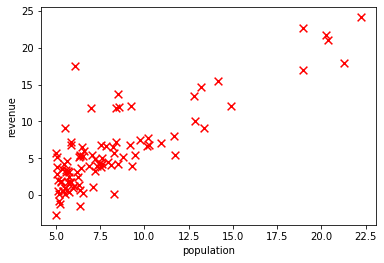

In [3]:
import pandas as pd


def plotData(x, y):
    """
    새로운 figure에 데이터 포인트 x와 y를 그린다.
    인구수와 이윤에 대한 축 라벨을 준다.
    """

    plt.figure() #새로운 figure 생산
    # XXX: scatter(): 산점도를 그린다.
    # c: 색상, s: 사이즈, marker: 표시모양
    plt.scatter(x, y, marker='x', c='r', s=60)
    plt.xlabel('population')
    plt.ylabel('revenue')
    #plt.show()

# *************************************************************************
# XXX: pandas에서 읽은 데이터는 항상 np.array 또는 np.matrix로 변환한다. 
# 그렇지 않으면 데이터 추출 시 TypeError: unhashable type: 'slice' 오류 발생함
# pandas에서는 컬럼 추출 시 data[column_index]와 같은 식으로 사용한다.
# *************************************************************************
# data: 97x2
# 첫번째 컬럼은 데이터 x, 두번째 컬럼은 label y
# import pandas as pd
#data = pd.read_csv('./ex1data1.txt', header=None)

# ****************************************************
# XXX: np.loadtxt(): , 로 구분된 텍스트 데이터 읽기
# ****************************************************
data = np.loadtxt('/content/ex1data1.txt', delimiter=',')

X = data[:,0:1]
y = data[:,1]
m = np.size(X, 0) # == X.shape[0], np.shape(X)

print(X.shape)
plotData(X, y)

**2.2 Gradient Descent**

Gradient Descent를 이용하여 데이터 셋에 대한 linear regression parameter 세타를 적절하게 구할 것이다.

#Linear regression의 주 목적: cost function을 최소화 하기


In [4]:
# =================== Part 3: Gradient descent ===================

# ********************************************************************
# XXX: np.ones 사용 시 생성할 매트릭스 포맷을 그대로 전달하게끔 습관화한다.
# np.ones, hstack 모두 인자를 하나만 받는다. ex: np.ones(a), hstack(b)
# ********************************************************************
# 절편(intercept) 항목을 추가한다.

print('Running Gradient Descent ...')

# 미리 절편이 추가될 컬럼을 포함한 행렬을 준비하고...
X = np.zeros((m, 2)) #m은 X의 사이즈
X[:, 0] = np.ones(m) # 1의 컬럼을 X에 추가한다.
X[:, 1] = data[:, 0] # fitting 파라미터를 초기화한다.

# 아래 코드도 같은 결과임.
#X = hstack((np.ones((m, 1)), data[:, 0]))
theta = np.zeros(2)

Running Gradient Descent ...


In [5]:
def computeCost(X, y, theta):
    """
    linear regression에 대한 비용 cost를 계산한다.
    X와 y에 있는 데이터 포인트를 fit 시키기 위해서 
    theta를 linear regression에 대한 파라미터로 사용하고 비용을 계산한다.
    """
    # 유용한 값들을 초기화 한다.
    m, n = X.shape
    
    # 아래 변수를 올바르게 반환해야 한다.
    J = 0
    
    # ====================== YOUR CODE HERE ======================
    # 특정 theta에 대한 cost를 계산한다.
    # J를 cost로 설정해야 한다.
    
    # X: 97x2, theta: 2x1
    prediction = X.dot(theta)

    # XXX: 실수 연산할 때는 반드시 실수를 사용한다. 예: 2(X), 2.0(O)
    error = (prediction - y)#에러=예측값과 관측값의 차이
    J = 1 / (2.0 * m) * np.sum(error ** 2) #손실함수
    
    return J

# 몇 가지 gradient descent 설정을 한다.
iterations = 1500
alpha = 0.01

# 초기값을 계산하고 표시한다.
ans = computeCost(X, y, theta)

print('ans = %0.3f' % ans)
# 답: 32.073

ans = 32.073


In [6]:
# You should now submit your solutions.

def gradientDescent(X, y, theta, alpha, num_iters): 
    """
    theta를 학습하기 위해 gradient descent를 수행한다.
    theta를 업데이트 하는데, num_iters 만큼 learning rate alpha를
    가진 gradient 단계를 수행한다.
    """
    
    # 몇 가지 유용한 값을 초기화한다.
    m = np.size(y)
    J_history = np.zeros(num_iters)
    
    # ====================== YOUR CODE HERE ======================
    # 지시사항: 파라미터 벡터 theta 상에서 하나의 gradient 단계를 수행한다.
    # Hint: 디버깅하는 동안, cost function (computeCost)와 gradient를
    # 여기서 출력해보는 것은 도움이 될 수 있다.
    
    for iter in range(num_iters):  #num_iters만큼의횟수로 반복한다
        
        prediction = X.dot(theta) #예측값=X와세타의 행렬곱
        error = prediction - y #에러=예측값-관측값
        
        delta = (1.0 / m) * error.T.dot(X) #손실함수를세타에관해미분한값
        theta = theta - alpha * delta.T #매번세타를업데이트한다.미분한값을빼면서
        
        J_history[iter] = computeCost(X, y, theta) #모든세타들의배열
        
    return theta, J_history

# gradient descent를 실행한다.
theta, j = gradientDescent(X, y, theta, alpha, iterations)

print('Theta found by gradient descent: %f %f' % (theta[0], theta[1]))

"""
In Octave/MATLAB: 

Theta found by gradient descent: -3.630291 1.166362
"""
    
# 최소비용
j[-1] #제일마지막에업데이트된세타가최적의세타

Theta found by gradient descent: -3.630291 1.166362


4.483388256587725

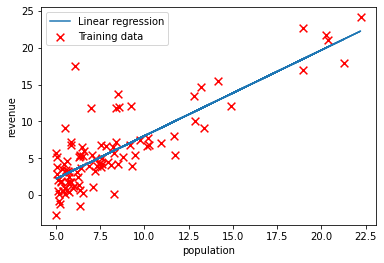

In [7]:
# linear fit을 plot한다.

plotData(X[:, 1], y) # 이전 산점도를 그대로 그린다.

plt.plot(X[:,1], X.dot(theta), '-')
plt.legend(('Linear regression', 'Training data'))
#plt.axis([5, 25, -5, 25]) # 임의로 추가함

In [8]:
# 인구수의 크기가 35,000 그리고 70,000 일때 예측한다.
predict1 = np.sum([1, 3.5] * theta)
print('For population = 35,000, we predict a profit of %f' % (predict1 * 10000))
predict2 = np.sum([1, 7] * theta)
print('For population = 70,000, we predict a profit of %f' % (predict2 * 10000))

"""
For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129
"""
print

For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129


<function print>

**2.3 Debugging**

1. Octave/MATLAB 배열은 0이 아닌 1부터 인덱스가 시작한다. 만약 theta로 불리는 벡터에 theta0, theta1을 저장한다면 값은 theta(1), tehat(2)가 될 것이다.

2.  matrix 연산을 검사해서 matrix 를 더하고 곱할 때 dimension이 일치하는지 확인해야 한다
---- size함수를 이용하여 차원을 확인한다-

3. 기본적으로 Octave/MATLAB은 수학 연산을 matrix 연산으로 해석한다. 만약 행렬 곱셈을 원하지 않는다면 "dot" 표시를 추가할 필요가 있다. 예를 들어, A B는 행렬 곱셈이고, A . B는 요소 곱셈이다. (역주: python에서는 np.array에서 내적은 A.dot(B)로 하고 np.matrix에서는 A * B로 한다.)

Visualizing J(theta_0, theta_1) ...


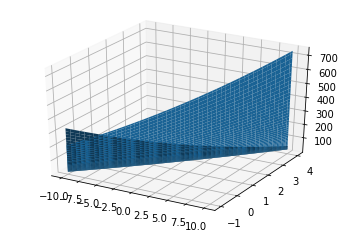

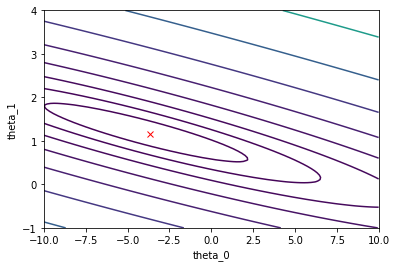

theta1 = -3.630291, theta2 = 1.166362



In [9]:
# TODO: 아래 그래프는 작업 중

## ============= Part 4: Visualizing J(theta_0, theta_1) =============
print('Visualizing J(theta_0, theta_1) ...')

# J를 계산하게 될 그리드
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# J_vals를 0으로 초기화된 매트릭스로 구성한다.
J_vals = np.zeros((np.size(theta0_vals), np.size(theta1_vals)))

# J_vals값을 채운다.
for i in np.arange(np.size(theta0_vals)):
    for j in np.arange(np.size(theta1_vals)):
        t = [theta0_vals[i], theta1_vals[j]]
        J_vals[i, j] = computeCost(X, y, t)
        
# surf 명령어에서 meshgrids가 동작하는 방식때문에, surf를 호출하기 전에 
# J_vals값을 전치시킬 필요가 있다. 그렇지 않으면 축이 뒤집어 질 것이다.
J_vals = J_vals.T

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals)
plt.show()

# Contour plot
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
#plt.contour(theta0_vals, theta1_vals, J_vals)
plt.xlabel('theta_0')
plt.ylabel('theta_1')

plt.plot(theta[0], theta[1], 'rx');
plt.show()

print('theta1 = %f, theta2 = %f' % (theta[0], theta[1]))

"""
In Octave:

theta1 = -3.630291, theta2 = 1.166362
"""
print()

**3. Linear regression with multiple variables**

이번엔 다변수 linear regression을 구현하고 집값을 예측한다. 최근에 판매된 집에 대한 정보를 먼저 수집하고 집의 판매 가격을 예측하는 모델을 만들어 보는 것이다.

파일 ex1data2.txt는 오레콘주 포틀랜드에 있는 집의 판매가격에 대한 training set을 포함하고 있다. 첫번째 컬럼은 집의 크기(평방 피트)이고, 두번째 컬럼은 침실의 숫자이다. 그리고 세번째 컬럼은 집의 가격이다.


**3.1 Feature Normalization**

feature의 차수가 다를때, 먼저 feature scaling을 수행하는 것이 gradient descent 수렴을 더욱 빨리 만들 수 있다.

-데이터넷에서 각 feature의 평균값을 뺀다.
-평균을 뺀 이후에, 부가적으로 feature값을 scale(나눈다) 하는데 그들 각각의 "표준 편차"로 나눈다.

In [10]:
## ================ Part 1: Feature Normalization ================

data = np.loadtxt('/content/ex1data2.txt',delimiter=',')

X = data[:,0:2] #X에는 `1(집의크기),2(침실의숫자)번의 요소가 입력
y = data[:,2] #y에는 3(집의가격)의 요소가 입력
m = np.size(y,0)

# 몇몇 데이터 포인트를 출력한다.
print('First 10 examples from the dataset: ')
#print(' x = [%.0f %.0f], y = %.0f', [X(1:10,:) y(1:10,:)]')
for i in np.arange(10):
    print(' x = [%.0f %.0f], y = %.0f' % (X[i, 0], X[i, 1], y[i]))


def featureNormalize(X):
    """
    X내의 features를 정규화한다. (X는 변수,특징이고 y는 관측값 실제값)
    이 함수는 X의 정규화 버전을 반환하는데, 각 feature의 평균값은 0이 되고 표준 편차는
    1이 된다. 이것은 종종 learning 알고리즘을 가지고 작업할 때 좋은 전처리 단계가
    된다.
    
    피쳐 정규화 함수: 각각의 피쳐는 단위가 다르기 때문에 평균이 0이고 표준편차가 1인
    정규화 값으로 변환된다.
    """
    # *******************************************************************
    # XXX: MATLAB의 std는 N-1을 한다. numpy의 std는 기본이 N을 사용한다.
    # ddof 값이 주어지면 N - ddof를 사용하게 된다.
    # *******************************************************************
    # 0은 column 단위 연산, 1은 row 단위 연산 적용
    # 아래 변수를 올바르게 반환해야 한다.
    mu = np.mean(X, 0)  #X의 평균
    sigma = np.std(X, axis=0, ddof=1) #X의 표준편차
    
    # ====================== YOUR CODE HERE ======================
    # 지시사항: 먼저, 각 feature 차원에 대해서, feature의 평균을 계산하고
    # 데이터셋에서 평균값을 뺀다. 그리고 평균값은 mu에 저장한다.
    # 그 다음에, 각 fetaure에 대한 표준 편차를 계산하고 표준편차로 각 feature를
    # 나눈다. 그리고 표준 편차는 sigma에 저장한다.
    
    # X는 각 컬럼이 하나의 feature이고 각 row가 하나의 example임을 주목하라.
    # 당신은 각 feature에 대한 정규화를 개별적으로 수행해야 한다.
    
    # Hint: 'mean'과 'std' 함수가 유용하다.
    
    # np.tile()을 사용하나 그냥 사용하나 동일한 결과이다.
    # X_norm = (X_norm - np.tile(mu, (m, 1))) / np.tile(sigma, (m, 1)) #아래와 동일 코드
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

# features를 scale하고 평균 0으로 설정한다.
print('Normalizing Features ...')

# X의 피쳐를 정규화 시키고 평균 mu, 표준편차 sigma를 저장한다.
X, mu, sigma = featureNormalize(X)

"""
In Octave:

   0.13001  -0.22368
  -0.50419  -0.22368
   0.50248  -0.22368
  -0.73572  -1.53777
   1.25748   1.09042
"""

# 절편(intercept) 항목을 추가한다.
# *******************************************************************
# XXX: 절편(intercept) 항목 1을 추가하는 방법
# 1) 절편 항목을 포함한 행렬을 만든 후 1 컬럼벡터를 할당
# 2) hstack() 함수 사용: X_norm = hstack((np.ones((m, 1)), X_norm))
# 3) np.column_stack() 함수 사용 => 여기서는 이 함수를 사용한다.
# *******************************************************************
m, n = X.shape
X = np.column_stack((np.ones(m), X))

print(X[0:5, :])

First 10 examples from the dataset: 
 x = [2104 3], y = 399900
 x = [1600 3], y = 329900
 x = [2400 3], y = 369000
 x = [1416 2], y = 232000
 x = [3000 4], y = 539900
 x = [1985 4], y = 299900
 x = [1534 3], y = 314900
 x = [1427 3], y = 198999
 x = [1380 3], y = 212000
 x = [1494 3], y = 242500
Normalizing Features ...
[[ 1.          0.13000987 -0.22367519]
 [ 1.         -0.50418984 -0.22367519]
 [ 1.          0.50247636 -0.22367519]
 [ 1.         -0.73572306 -1.53776691]
 [ 1.          1.25747602  1.09041654]]


In [11]:
## ================ Part 2: Gradient Descent ================
# 지시사항: 우리는 다음의 스타터 코드를 제공했는데, 그것은 특정 
# 학습률 learning rate (alpah)를 가지고 gradient descent를 실행한다.

# 당신의 작업은 먼저 당신의 함수 - computeCost와 gradientDescent가 이미 
# 스타터 코드와 잘 동작하고 다변수도 지원함을 확인해야 한다.

# 그리고 난 다음, 서로 다른 alpha값을 가지고 gradient descent를 실행시켜봐라.
# 그리고 어떤 값이 가장 좋은 결과를 주는지 확인해라.

# 마지막으로, 끝에 있는 코드를 환성해서 1650 sq-ft, 3 br을 가진 집값을 예측한다.

# Hint: 'hold on' 명령어를 사용해서, 동일한 figure 위에 여러 그래프를 plot할 수 있다.

# Hint: 예측시에, 동일한 feature 정규화를 사용했는지 확인하라.

In [12]:
def computeCostMulti(X, y, theta):
    """
    비용함수 J: 다변량 변수를 가진 linear regression에 대한 cost를 계산한다.
    theta를 linear regression에 대한 파마리터로 사용해서 데이터 포인트 x와 y를
    fit 시킨다. 그리고 cost를 계산한다.
    
    다변량 X에 대해서 예상값(predictions)과 실제값(y)의 오차제곱합을 구한다.
    """
    
    # 몇몇 유용한 값 초기화
    m = np.size(y) # training examples의 갯수
    
    # 아래 변수를 올바르게 반환해야 한다.
    J = 0
    
    # ====================== YOUR CODE HERE ======================
    # 지시사항: 특정 theta에 대한 cost를 계산하고, J에 cost를 설정한다.
    
    # X: 97x2, theta: 2x1
    prediction = X.dot(theta)
    
    error = prediction - y
    sqrError = error**2
    J = 1.0 / (2.0*m)*np.sum(sqrError)
    
    return J

In [13]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    theta를 학습하기 위해 gradient descent를 수행한다.
    이 함수는 learning rate alpha를 가지고 gradient를 num_iters 
    만큼 단계를 취해서 theta를 업데이트 한다.
    
    기울기 최소화 함수: 다변량 X에 대해서 계산
    이후 exercise 2에서 나오는 minimize() 함수와 같은 역할을 한다.
    """
    
    # 변수 초기화
    m = np.size(y)
    J_history = np.zeros((num_iters, 1))
    
    for iter in range(num_iters):
        # ====================== YOUR CODE HERE ======================
        # 지시사항: 파라미터 벡터 theta 상에 한 번의 gradient를 수행한다.
        # Hint: 디버깅하는 동안, cost function (computeCostMulti)와 
        # gradient를 여기서 출력해보는 것이 도움이 된다.
        
        prediction = X.dot(theta)
        error = prediction - y
        
        delta = (1.0 / m) * error.T.dot(X)
        theta = theta - alpha * delta.T
        
        # 매 반복마다 cost J를 저장한다.
        J_history[iter, 0] = computeCostMulti(X, y, theta)
        
    return theta, J_history

Running gradient descent ...


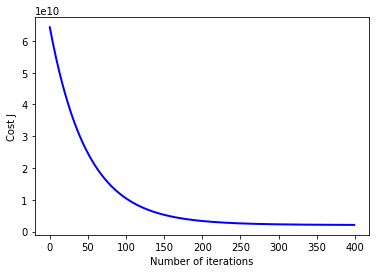

Theta computed from gradient descent: 
 [334302.06399328 100087.11600585   3673.54845093]


<function print>

In [14]:

print('Running gradient descent ...')

# 몇몇 alpha 값을 선택한다.
alpha = 0.01
num_iters = 400

# Theta를 초기화하고 Gradient descent를 실행한다.
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# convergence graph를 plot한다.
plt.plot(J_history, '-b', lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

# gradient descent의 결과를 출력한다.
print('Theta computed from gradient descent: ')
print(' %s' % theta)

"""
In Octave/MATLAB: 

Theta computed from gradient descent:
 334302.063993 
 100087.116006 
 3673.548451
"""
print

my alpha is 0.3
my alpha is 0.1
my alpha is 0.03
my alpha is 0.01
top 5: arr_J


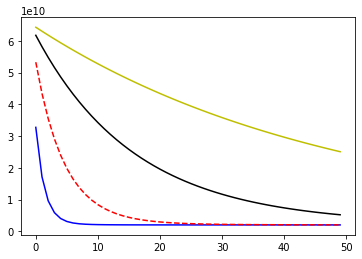

In [15]:
# 최적의 alpha값을 찾는다.
# alpha와 반복횟수를 조절하면서 alpha값을 찾는다.

# 반복에 따른 cost J를 이용해서 최적의 alpha값을 찾는다.
# 50회만 반복 수행한다.
# J_history는 num_iters x 1의 컬럼벡터이다.
arr_alpha = [0.3, 0.1, 0.03, 0.01]
num_iters = 50
arr_J = np.zeros((num_iters, len(arr_alpha)))
i = 0;
for my_alpha in arr_alpha:
    print('my alpha is %s' % my_alpha)
    theta = np.zeros(3)
    theta, J_history = gradientDescentMulti(X, y, theta, my_alpha, num_iters)
    arr_J[:, i] = J_history.T
    i = i + 1
    
print('top 5: arr_J')
arr_J[0:5, :]

# alpha = 0.1 에서 최적의 학습곡선이 보여지고 있다.
plt.plot(arr_J[0:50, 0], 'b')
plt.plot(arr_J[0:50, 1], 'r--')
plt.plot(arr_J[0:50, 2], 'k')
plt.plot(arr_J[0:50, 3], 'y')

In [16]:
# 1650 평방피트의 3개의 침실을 가진 집의 가격을 평가한다.
# ====================== YOUR CODE HERE ======================
# X의 첫번째 컬럼은 모두 1임을 기억해라. 따라서 그것은 정규화될 필요가
# 없다.

# 위에서 구해진 최적의 alpha와 num_iters를 설정한다.
alpha = 0.1
num_iters = 50

# Theta를 초기화하고 Gradient Descent를 실행한다.
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

print('best theta for gradient descent... ')
print(theta)

# Estimate the price of a 1650 sq-ft, 3 br house
price = 0
new_x = np.array([1650, 3])

# x 값을 정규화 시킨다.
new_x = (new_x - mu) / sigma
#new_x = hstack(([np.ones(1), new_x])) # 아래 코드와 동일
new_x = np.append(1, new_x)
print(new_x)

# y(price)를 예측한다.
price = new_x.dot(theta)

print('Predicted price of a 1650 sq-ft, 3 br house (Using gradient descent) %s' % price)


"""
best theta for gradient descent... 
theta =

   3.3866e+05
   1.0413e+05
  -1.7221e+02

new_x =

  -0.44127  -0.22368

new_x =

   1.00000  -0.44127  -0.22368

price =    2.9275e+05
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $292748.085232
"""
print()

best theta for gradient descent... 
[ 3.38658249e+05  1.04127516e+05 -1.72205334e+02]
[ 1.         -0.4412732  -0.22367519]
Predicted price of a 1650 sq-ft, 3 br house (Using gradient descent) 292748.0852321537



**3.3 Normal Equation**

**$ \theta = (X^{T}X)^{-1}X^{T}y $**

이 공식을 이용하는 것은 어떠한 feature scaling도 요구하지 않고, 한번의 계산으로 정확한 솔루션을 구할 수 있다: gradient descent와 같이 "loop until convergence" 가 없다.






In [18]:
## ================ Part 3: Normal Equations ================
# 지시사항: 다음의 코드는 normal equations를 사용해서 closed form 
# 솔루션을 계산한다. normalEqn.m 내의 코드를 완성해야 한다.

# 그렇게 하고난 후, 1650 평방-피트, 3개의 침실을 가진 집의 가격을
# 예측하기 위해 이 코드를 완성해야 한다.

def normalEqn(X, y):
    """
    linear regression에 대한 closed-form solution을 계산한다.
    이 함수는 normal equations를 사용해서 linear regression에 대한
    closed-form solution을 계산한다.
    """
    
    # ====================== YOUR CODE HERE ======================
    # 지시사항: linear regressin에 대한 closed form solution을 계산하는
    # 코드를 완성하고 결과를 theta에 저장하라.
    
    """
    # 역행렬: A.I == linalg.inv(A)

    # 1) 행렬 방식으로 계산
    m, n = X.shape
    X = matrix(X)
    
    y = y.reshape((m, 1))
    y = matrix(y)
    
    theta = (X.T * X).I * X.T * y
    
    """
    
    # 2) numpy의 array 방식으로 계산
    #theta = np.zeros((X.shape[1])) # theta 초기화
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    
    
    return theta


# 데이터 로드
#data = pd.read_csv('ex1data2.txt', header=None) # 아래 코드와 동일
#data = np.array(data)
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]
m = np.size(y, 0)

# 절편(intercept) 항목을 추가한다.
#X = hstack((np.ones((m, 1)), X)) # 아래 코드와 동일
X = np.column_stack((np.ones(m), X))

# normal equation 으로부터 파라미터를 계산한다.
theta = normalEqn(X, y)

# normal equation의 결과를 표시한다.
print('Theta computed from the normal equations: ')
print(' %s ' % theta)


"""
In Octave/MATLAB:

matrix([[ 89597.9095428 ],
        [   139.21067402],
        [ -8738.01911233]])
"""
print

Theta computed from the normal equations: 
 [89597.9095428    139.21067402 -8738.01911233] 


<function print>

In [19]:

# 1650 sq-ft, br3 인 집의 가격을 예측한다.
# ====================== YOUR CODE HERE ======================
# 위에서 gradientdescent 방식으로 구한 가격과 비슷함을 알 수 있다.
price = 0 # 당신은 이 값을 변경해야 한다.

# x featues에 1을 추가한다.
new_x = [1, 1650, 3]
price = sum(new_x * theta)

print('Predicted price of a 1650 sq-ft, 3 br house ')
print('(using normal equations):\n $%f' % price)

"""
In Octave/MATLAB: 

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 $293081.464335
"""
print

Predicted price of a 1650 sq-ft, 3 br house 
(using normal equations):
 $293081.464335


<function print>